In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df_rawdata = pd.read_csv('train.csv', sep = '|')
df_rawdata = df_rawdata.dropna()
df_rawdata.head()

,lineID,day,pid,adFlag,availability,competitorPrice,click,basket,order,price,revenue
0,1,1,6570,0,2,14.60,1,0,0,16.89,0.00
1,2,1,14922,1,1,8.57,0,1,0,8.75,0.00
2,3,1,16382,0,1,14.77,0,1,0,16.06,0.00
3,4,1,1145,1,1,6.59,0,0,1,6.55,6.55
4,5,1,3394,0,1,4.39,0,0,1,4.14,4.14


In [3]:
def get_label(df):
    if df['click']:
        return 1
    elif df['basket']:
        return 2
    elif df['order']:
        return 3
    else:
        pass


In [4]:
# 這行會跑一輩子...小的會再想一下改得快一點....
df_rawdata = df_rawdata.assign(
    classLabel=df_rawdata.apply(get_label, axis=1))

In [5]:
df_rawdata.head()

,lineID,day,pid,adFlag,availability,competitorPrice,click,basket,order,price,revenue,classLabel
0,1,1,6570,0,2,14.60,1,0,0,16.89,0.00,1
1,2,1,14922,1,1,8.57,0,1,0,8.75,0.00,2
2,3,1,16382,0,1,14.77,0,1,0,16.06,0.00,2
3,4,1,1145,1,1,6.59,0,0,1,6.55,6.55,3
4,5,1,3394,0,1,4.39,0,0,1,4.14,4.14,3


In [6]:
y = df_rawdata['classLabel']
X = df_rawdata[[item for item in df_rawdata.columns 
 if item not in['click', 'basket', 'order', 'classLabel']]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

#Training data points: 1858721
#Testing data points: 796595
Class labels: [1 2 3]


In [7]:
from sklearn.tree import DecisionTreeClassifier

# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [8]:
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

# a more convenient way to evaluate a trained model is to use the sklearn.metrics 
from sklearn.metrics import accuracy_score
print('Accuracy (tree, sklearn): %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 128420
Accuracy (tree): 0.84
Accuracy (tree, sklearn): 0.84


In [9]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', 
                feature_names=X.columns.values)

In [13]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

0

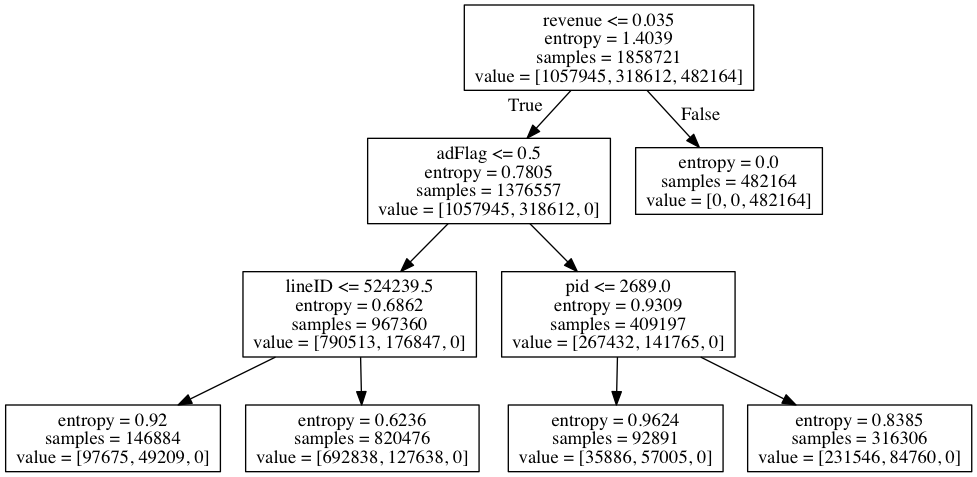

In [14]:
from IPython.display import Image
Image(filename='tree.png')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))